<a href="https://colab.research.google.com/github/farhanmuammar/DeepLearning/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
mkdir -p /content/deeplearning

In [2]:
!unzip /content/drive/MyDrive/deeplearning/dp.zip -d /content/dp

Archive:  /content/drive/MyDrive/deeplearning/dp.zip
   creating: /content/dp/dp/
   creating: /content/dp/dp/All_images/
   creating: /content/dp/dp/All_images/Broadtailed_female/
  inflating: /content/dp/dp/All_images/Broadtailed_female/001.jpg  
  inflating: /content/dp/dp/All_images/Broadtailed_female/002.jpg  
  inflating: /content/dp/dp/All_images/Broadtailed_female/003.jpg  
  inflating: /content/dp/dp/All_images/Broadtailed_female/004.jpg  
  inflating: /content/dp/dp/All_images/Broadtailed_female/005.jpg  
  inflating: /content/dp/dp/All_images/Broadtailed_female/006.jpg  
  inflating: /content/dp/dp/All_images/Broadtailed_female/007.jpg  
  inflating: /content/dp/dp/All_images/Broadtailed_female/008.jpg  
  inflating: /content/dp/dp/All_images/Broadtailed_female/009.jpg  
  inflating: /content/dp/dp/All_images/Broadtailed_female/010.jpg  
  inflating: /content/dp/dp/All_images/Broadtailed_female/011.jpg  
  inflating: /content/dp/dp/All_images/Broadtailed_female/012.jpg  
  i

In [4]:
''' Global Configuration Settings '''
class CFG:
    
    def __init__(self):
        self.labels = 4
        self.sshape = (100,100,3)
        self.n_epochs = 50
        self.seed = 221

cfg = CFG()

In [6]:
import os
import numpy as np
import random as rn
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from PIL import Image
%matplotlib inline
import time

from keras import models
import tensorflow as tf
from tensorflow.keras import applications as app
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,AveragePooling2D
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tqdm.keras import TqdmCallback
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from functools import partial
import keras
from keras import backend as K

os.environ['PYTHONHASHSEED'] = '0'                      
np.random.seed(cfg.seed)
rn.seed(cfg.seed)
tf.random.set_seed(cfg.seed)

lst_color = ['#B1D784','#2E8486','#004379','#032B52','#EAEA8A']

''' Folder Pathways'''
main_folder = '/content/dp/dp/hummingbirds/'
train_folder = '/content/dp/dp/hummingbirds/train/'
val_folder = '/content/dp/dp/hummingbirds/valid/'
test_folder = '/content/dp/dp/hummingbirds/test/'
video_folder = '/content/dp/dp/video_test/'

In [7]:
os.listdir(main_folder)

['test', 'train', 'valid']

In [8]:
os.listdir(train_folder)

['Broadtailed_female', 'No_bird', 'Rufous_female', 'Broadtailed_male']

In [10]:
''' Visualise Image Data '''
def show_grid(image_list,nrows,ncols,label_list=None,
              show_labels=False,savename=None,
              figsize=(20,10),showaxis='off'):
    
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(nrows, ncols),  
                     axes_pad=0.3, 
                     share_all=True)
    
    for i in range(nrows*ncols):
        ax = grid[i]
        img = Image.open(image_list[i])
        ax.imshow(img,cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis(showaxis)
        if show_labels:
            ax.set_title(class_mapping[y_int[i]])
    if savename != None:
        plt.savefig(savename,bbox_inches='tight')

In [11]:
lst_temp = os.listdir(train_folder+'/Rufous_female')
lst_rufous_female = []
for i in lst_temp:
    lst_rufous_female.append(train_folder+'/Rufous_female/'+i)
    
lst_temp = os.listdir(train_folder+'/Broadtailed_female')
lst_broad_female = []
for i in lst_temp:
    lst_broad_female.append(train_folder+'/Broadtailed_female/'+i)
    
lst_temp = os.listdir(train_folder+'/Broadtailed_male')
lst_broad_male = []
for i in lst_temp:
    lst_broad_male.append(train_folder+'/Broadtailed_male/'+i)
  
lst_temp = os.listdir(train_folder+'/No_bird')
lst_none = []
for i in lst_temp:
    lst_none.append(train_folder+'/No_bird/'+i)

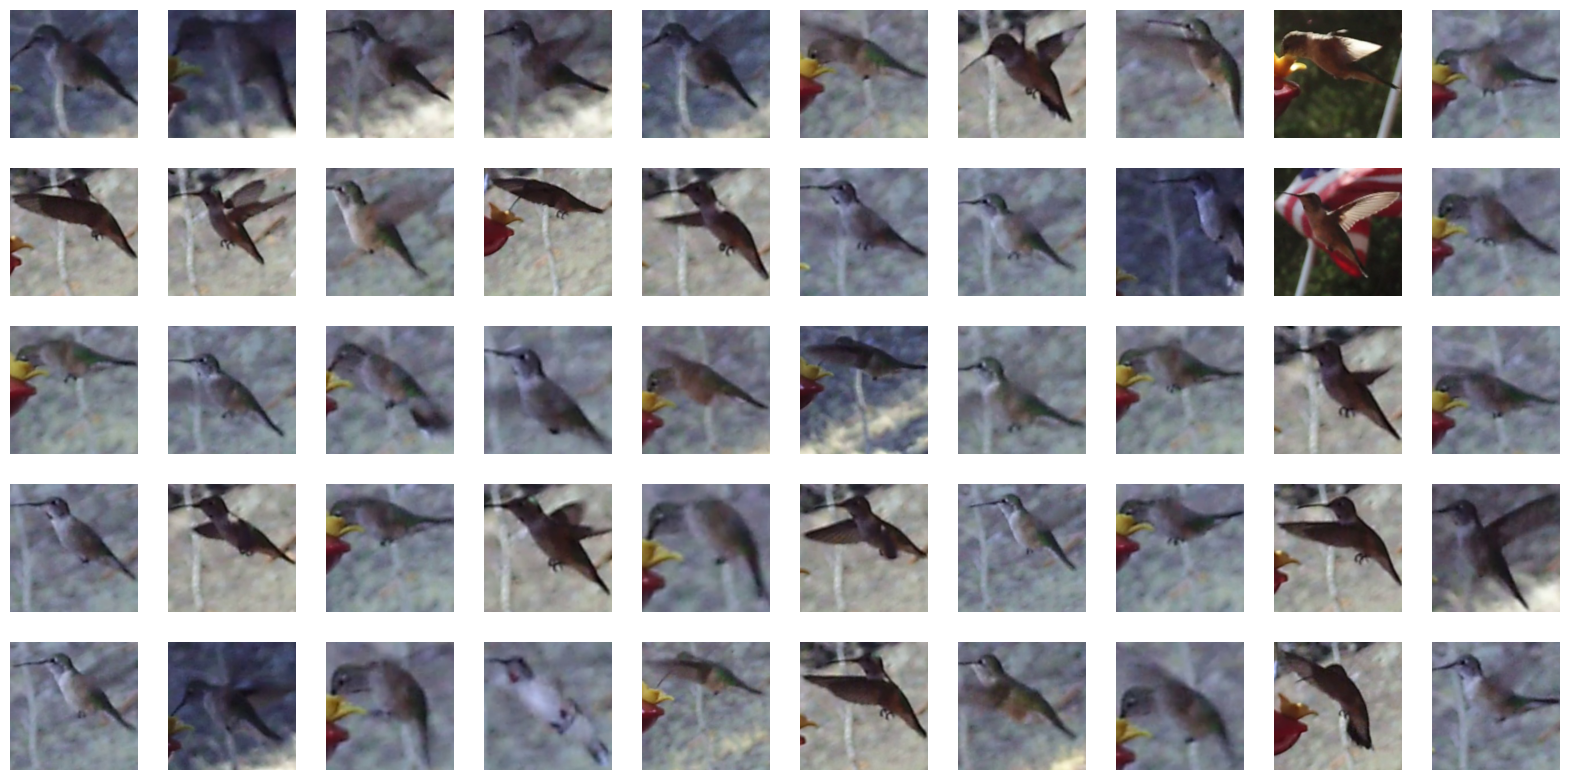

In [12]:
show_grid(lst_rufous_female,5,10,figsize=(20,10))

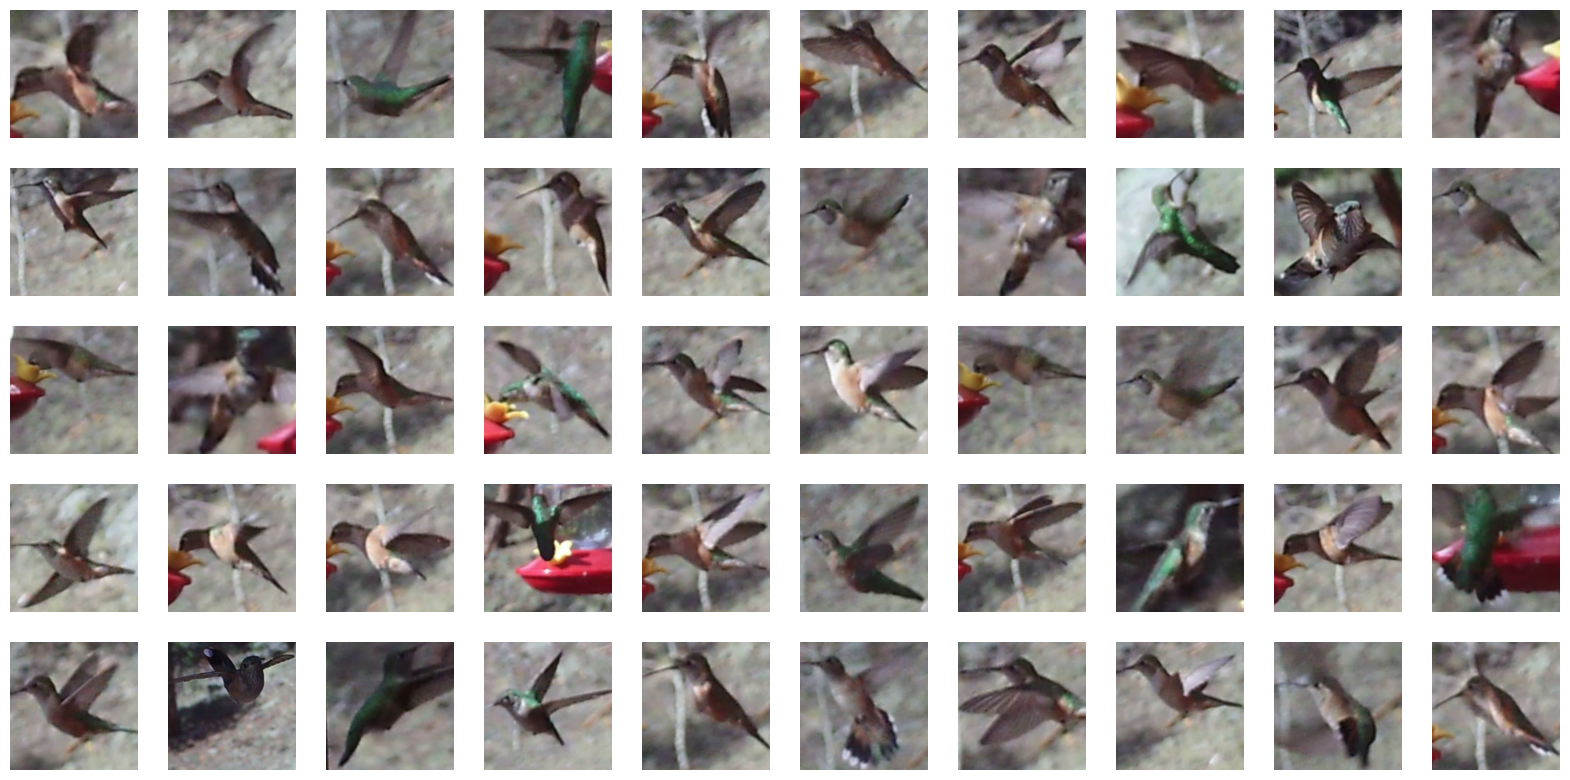

In [13]:
show_grid(lst_broad_female,5,10,figsize=(20,10))

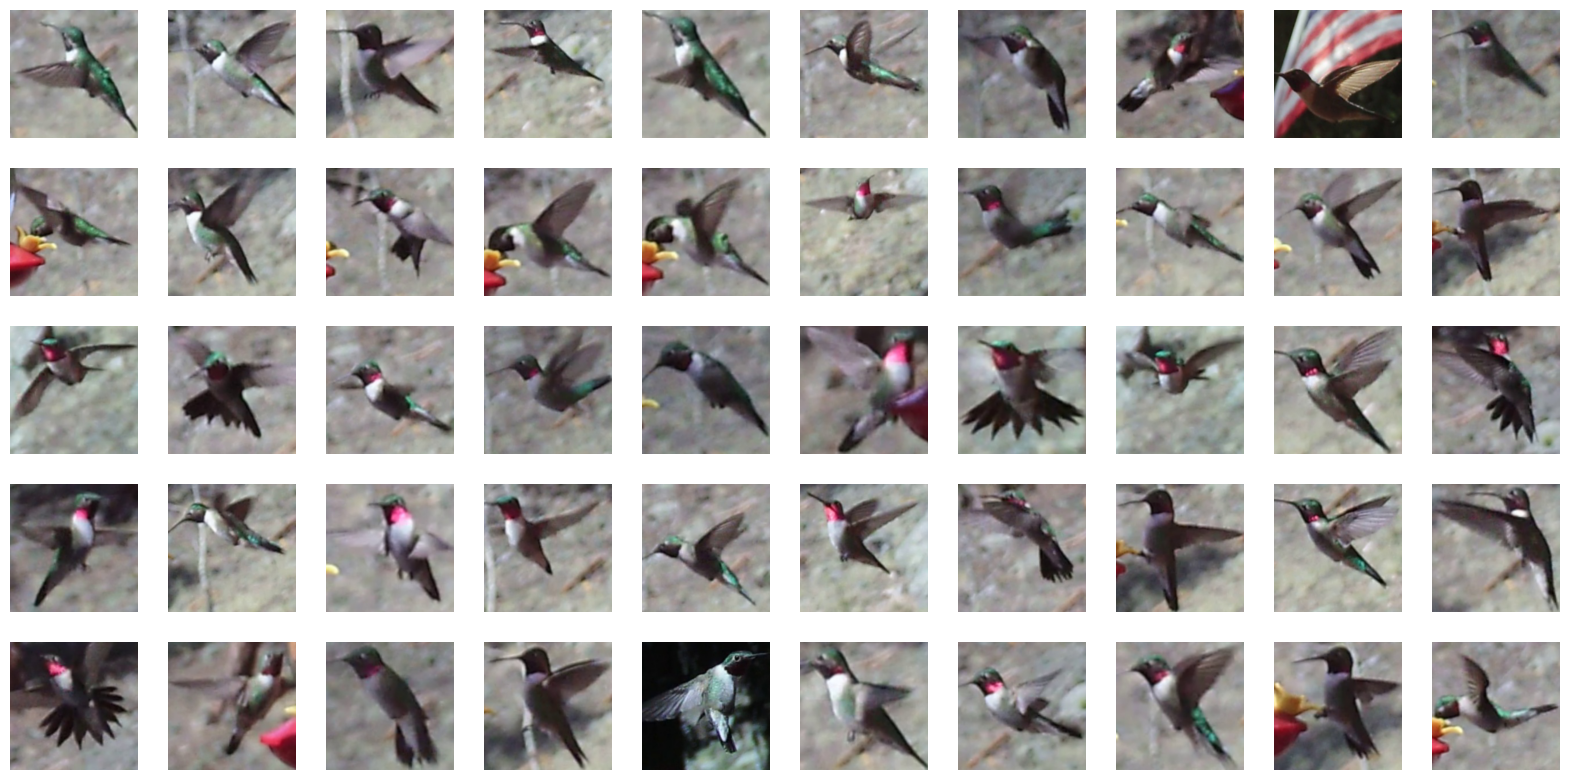

In [14]:
show_grid(lst_broad_male,5,10,figsize=(20,10))

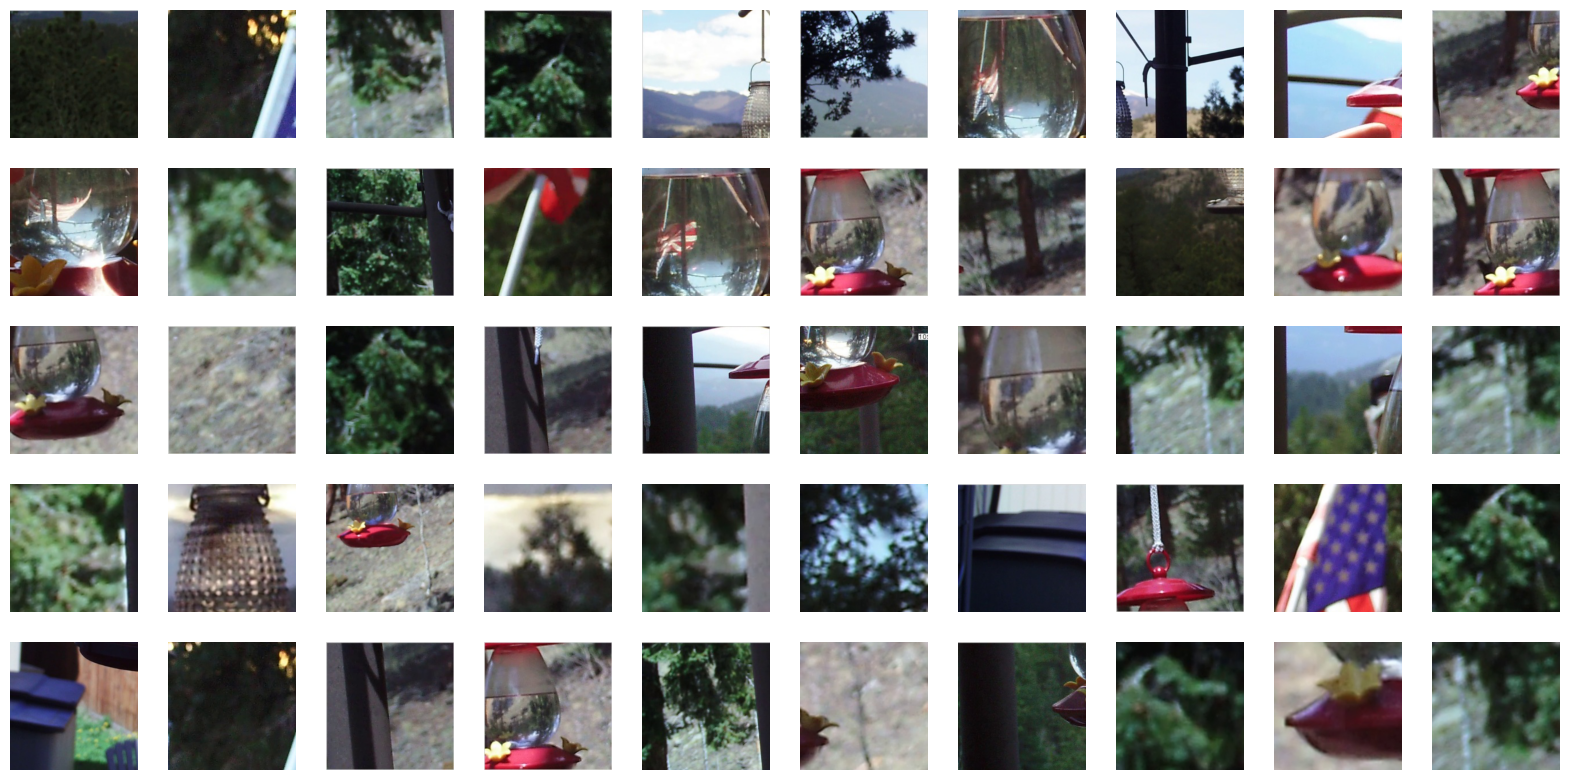

In [15]:
show_grid(lst_none,5,10,figsize=(20,10))

In [16]:
class_types = len(os.listdir(train_folder))
print('Number of classes for Classification: ',class_types)
class_names = os.listdir(train_folder)
print(f'The class names are {class_names}\n')

print('Training dataset:')
for i in class_names:
    print(i + ':' + str(len(os.listdir(train_folder+i))))

print('\nValidation dataset:')
for i in class_names:
    print(i + ':' + str(len(os.listdir(val_folder+i))))
    
print('\nTest dataset:')
for i in class_names:
    print(i + ':' + str(len(os.listdir(test_folder+i))))

Number of classes for Classification:  4
The class names are ['Broadtailed_female', 'No_bird', 'Rufous_female', 'Broadtailed_male']

Training dataset:
Broadtailed_female:100
No_bird:100
Rufous_female:100
Broadtailed_male:100

Validation dataset:
Broadtailed_female:20
No_bird:20
Rufous_female:20
Broadtailed_male:20

Test dataset:
Broadtailed_female:20
No_bird:20
Rufous_female:20
Broadtailed_male:20


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# Define DataGenerators
train_datagen = ImageDataGenerator(rescale=1.0/255)
gen_datagen = ImageDataGenerator(rescale=1.0/255)

In [18]:
# DataGenerators via Folder Directory
gen_train = train_datagen.flow_from_directory(train_folder, 
                        target_size=(cfg.sshape[0],cfg.sshape[1]),  # target size
                        batch_size=32,                              # batch size
                        class_mode='categorical')    

gen_valid = gen_datagen.flow_from_directory(val_folder,
                        target_size=(cfg.sshape[0],cfg.sshape[1]),  # target size
                        batch_size=32,                              # batch size
                        class_mode='categorical')

gen_test = gen_datagen.flow_from_directory(test_folder,
                        target_size=(cfg.sshape[0],cfg.sshape[1]),  # target size
                        batch_size=32,                              # batch size
                        class_mode='categorical')

Found 400 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [19]:
# Evaluation Metrics for Callback
def get_recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def get_precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def get_f1(y_true, y_pred):
    precision = get_precision(y_true, y_pred)
    recall = get_recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [20]:
# Two Convolution Layer CNN
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3,
                            padding="same", 
                            activation="relu", 
                            input_shape=cfg.sshape),    
    keras.layers.Conv2D(64, kernel_size=3, 
                            padding="same", 
                            activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(cfg.labels, activation="softmax")
])

# Show the Model Architecture
model.summary()

''' Model Compilation '''
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['acc',get_f1,get_precision,get_recall])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 160000)            0         
                                                                 
 dropout (Dropout)           (None, 160000)            0         
                                                                 
 dense (Dense)               (None, 128)               20480128  
                                                        

In [21]:
''' Callback Options During Training '''
callbacks = [ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=0, 
                               factor=0.5,mode='max',min_lr=0.001),
             ModelCheckpoint(filepath=f'model_cnn.h5',monitor='val_accuracy',
                             mode = 'max',verbose=0,save_best_only=True),
             TqdmCallback(verbose=0)] 

''' Start Training '''
start = time.time()
history = model.fit(gen_train,
                    validation_data = gen_valid,
                    callbacks=callbacks,
                    verbose=0,
                    epochs=cfg.n_epochs  # Training for n_epoch interations
                   )
end = time.time()
print(f'The time taken to execute is {round(end-start,2)} seconds.')
print(f'Maximum Train/Val {max(history.history["acc"]):.4f}/{max(history.history["val_acc"]):.4f}')

0epoch [00:00, ?epoch/s]

The time taken to execute is 63.44 seconds.
Maximum Train/Val 1.0000/0.8625


In [22]:
''' FUNCTIONS FOR PLOTTING KERAS HISTORY RESULTS '''

# Function to plot all metrics side by side (defined above)
def plot_keras_metric(history):

    # Palettes
    lst_color = ['#B1D784','#2E8486','#004379','#032B52','#EAEA8A']
    metric_id = ['loss','get_f1','acc','get_precision','get_recall']
    fig = make_subplots(rows=1, cols=len(metric_id),subplot_titles=metric_id)

    jj=0;
    for metric in metric_id:     

        jj+=1

        # Main Trace
        fig.add_trace(go.Scatter(x=[i for i in range(1,cfg.n_epochs+1)],
                                 y=history.history[metric],
                                 name=f'train_{metric}',
                                 line=dict(color=lst_color[0]),mode='lines'),
                      row=1,col=jj)
        fig.add_trace(go.Scatter(x=[i for i in range(1,cfg.n_epochs+1)],
                                 y=history.history['val_'+metric],
                                 name=f'valid_{metric}',
                                 line=dict(color=lst_color[3]),mode='lines'),
                      row=1,col=jj)

        # difference between training/validation metrics
        if(metric is not 'loss'):
            diff = abs(np.array(history.history[metric]) - np.array(history.history['val_'+metric]))
            fig.add_trace(go.Bar(x=[i for i in range(1,cfg.n_epochs+1)],y=diff,name='metric diff.',
                                 text=diff.round(3),marker_color=lst_color[3],opacity=0.25,showlegend=False)
                          ,row=1,col=jj)

    fig.update_layout(yaxis=dict(range=[0,1]),yaxis_range=[0,1],
                      margin=dict(t=60,b=10),
                      height=300,showlegend=False,template='plotly_white',
                      hovermode="x",title=f'<b>CNN TRAINING</b>')
    fig['layout']['yaxis'].update(title='', range=[0,5], autorange=True,type='log')
    fig['layout']['yaxis2'].update(title='', range=[0, 1.1], autorange=False)
    fig['layout']['yaxis3'].update(title='', range=[0, 1.1], autorange=False)
    fig['layout']['yaxis4'].update(title='', range=[0, 1.1], autorange=False)
    fig['layout']['yaxis5'].update(title='', range=[0,1.1],autorange=False)
    fig.show()

<>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-22-96d3a85be378>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if(metric is not 'loss'):


In [23]:
plot_keras_metric(history)

In [24]:
def plot_keras_metric2(lst_history,names):

    # Palettes
    lst_color = ['#B1D784','#2E8486','#004379','#032B52','#EAEA8A']
    metric_id = ['get_f1','acc','get_precision','get_recall']

    ii=-1
    for i in range(len(lst_history)):

        ii+=1; history = lst_history[ii]
        fig = make_subplots(rows=1, cols=4,subplot_titles=metric_id); jj=0
        for metric in metric_id:     

            jj+=1

            # Main Trace
            fig.add_trace(go.Scatter(x=[i for i in range(1,cfg.n_epochs+1)],y=history.history[metric],
                                     name=f'train_{metric}_{ii}',line=dict(color=lst_color[0]),mode='lines'),
                          row=1,col=jj)
            fig.add_trace(go.Scatter(x=[i for i in range(1,cfg.n_epochs+1)],y=history.history['val_'+metric],
                                     name=f'valid_{metric}_{ii}',line=dict(color=lst_color[3]),mode='lines'),
                          row=1,col=jj)

            # difference between training/validation metrics
            diff = abs(np.array(history.history[metric]) - np.array(history.history['val_'+metric]))
            fig.add_trace(go.Bar(x=[i for i in range(1,cfg.n_epochs+1)],y=diff,name='metric diff.',
                                 text=diff.round(3),marker_color=lst_color[2],opacity=0.25,showlegend=False)
                          ,row=1,col=jj)

            # Rest are for reference only
            for j in range(len(names)):
                if(j != ii):
                    lhistory = lst_history[j]
                    fig.add_trace(go.Scatter(x=[i for i in range(1,cfg.n_epochs+1)],y=lhistory.history[metric],
                                             name=f'train_{metric}_{j}',opacity=0.3,showlegend=False,
                                             line=dict(color='#D3D3D3'),mode='lines'),row=1, col=jj)
                    fig.add_trace(go.Scatter(x=[i for i in range(1,cfg.n_epochs+1)],y=lhistory.history['val_'+metric],
                                             name=f'val_{metric}_{j}',opacity=0.3,showlegend=False,
                                             line=dict(color='#D3D3D3'),mode='lines'),row=1, col=jj)

        if(len(names)>1):
            title=f"{' | '.join(str(x) for x in names[ii])}"
            if(type(names[0]) is not list):
                title= names[ii]
        else:
            title= f"{''.join(str(x) for x in names[ii])}"                    
                    
        fig.update_yaxes(tickvals=[i for i in np.arange(0.0,1.0,0.1)])
        fig.update_layout(yaxis=dict(range=[0,1]),yaxis_range=[0,1],
                          template='plotly_white',font=dict(family='sans-serif',size=14),
                          title=title,height=300,showlegend=False,
                          margin=dict(t=60,b=10)
                         )
            
        fig['layout']['yaxis1'].update(title='', range=[0,1], autorange=False, tick0=0, dtick=5)
        fig['layout']['yaxis2'].update(title='', range=[0,1], autorange=False, tick0=0, dtick=5)
        fig['layout']['yaxis3'].update(title='', range=[0,1], autorange=False, tick0=0, dtick=5)
        fig['layout']['yaxis4'].update(title='', range=[0,1], autorange=False, tick0=0, dtick=5)

        fig.add_hline(y=1.0,line_width=5)
        fig.show()

In [25]:
''' Evaluate CNN model w/ imported list of augmentation options '''
# augment_model inputs nested lists of augmentation options & evaluates 

def augment_model(lst_aug):

    # Define DataGenerator, load image data from directory
    gen_train = lst_aug[0].flow_from_directory(train_folder, 
                            target_size=(cfg.sshape[0],cfg.sshape[1]),  # target size
                            batch_size=32,          # batch size
                            class_mode='categorical')    # batch size

    gen_valid = lst_aug[1].flow_from_directory(val_folder,
                            target_size=(cfg.sshape[0],cfg.sshape[1]),
                            batch_size=32,
                            class_mode='categorical')

    gen_test = lst_aug[1].flow_from_directory(test_folder,
                            target_size=(cfg.sshape[0],cfg.sshape[1]),
                            batch_size=32,
                            class_mode='categorical')
    
    # Define a CNN Model
    model = keras.models.Sequential([
        
        keras.layers.Conv2D(32, kernel_size=3, 
                                padding="same", 
                                activation="relu", 
                                input_shape=cfg.sshape),    
        keras.layers.Conv2D(64, 
                            kernel_size=3, 
                            padding="same", 
                            activation="relu"),
        
        keras.layers.MaxPool2D(),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(cfg.labels, activation="softmax")
    ])

    # Compile Model
    model.compile(optimizer='Adam',
                  loss='categorical_crossentropy',
                  metrics=['acc',get_f1,get_precision,get_recall])
    
    # Callback Options During Training 
    callbacks = [ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=0, 
                                   factor=0.5,mode='max',min_lr=0.001),
                 ModelCheckpoint(filepath=f'model_out.h5',monitor='val_accuracy',
                                 mode = 'max',verbose=0,save_best_only=True),
                 TqdmCallback(verbose=0)] 
    
    # Evaluate Model
    history = model.fit(gen_train,
                        validation_data = gen_valid,
                        callbacks=callbacks,
                        verbose=0,epochs=cfg.n_epochs)
    
    # Return Result History
    return history 

In [26]:
# lst of augmentation options
lst_augopt = ['rescale','horizontal_flip','vertical_flip',
              'brightness_range','rotation_range','shear_range',
              'zoom_range','width_shift_range','height_shift_range',
              'channel_shift_range','zca_whitening','featurewise_center',
              'samplewise_center','featurewise_std_normalization','samplewise_std_normalization']

# lst of default setting corresponding to lst_augopt
lst_augval = [1.0/255,True,True,  
              [1.1,1.5],0.2,0.2,
              0.2,0,0,
              0,True,False,
             False,False,False]

# Get Augmentation Names from lst_select options
def get_aug_name(lst_select):
    lst_selectn = [];
    for i in lst_select:
        tlst_all = []
        for j in i:
            tlist_selectn = tlst_all.append(lst_augopt[j])
        lst_selectn.append(tlst_all)
    return lst_selectn

# Model Evaluation w/ Augmentation
def aug_eval(lst_select=None):

    ii=-1; lst_history = []
    for augs in lst_select:

        print('Augmentation Combination')
        # get dictionary of augmentation options
        ii+=1; dic_select = dict(zip([lst_augopt[i] for i in lst_select[ii]],[lst_augval[i] for i in lst_select[ii]]))
        print(dic_select)

        # define augmentation options
        train_datagen = ImageDataGenerator(**dic_select) # pass arguments
        gen_datagen = ImageDataGenerator(rescale=1.0/255)

        # evaluate model & return history metric
        history = augment_model([train_datagen,gen_datagen])

        # store results
        lst_history.append(history)
        
    return lst_history

In [27]:
# Select Augmentation
lst_select = [[0,1],[0,2],[0,3],[0,1,5,6]] # list of augmentations
lst_selectn = get_aug_name(lst_select)     # get list of augmentation names
print(lst_selectn)

[['rescale', 'horizontal_flip'], ['rescale', 'vertical_flip'], ['rescale', 'brightness_range'], ['rescale', 'horizontal_flip', 'shear_range', 'zoom_range']]


In [28]:
# Evaluation Augmentation Models
history = aug_eval(lst_select) # get list of results

Augmentation Combination
{'rescale': 0.00392156862745098, 'horizontal_flip': True}
Found 400 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


0epoch [00:00, ?epoch/s]

Augmentation Combination
{'rescale': 0.00392156862745098, 'vertical_flip': True}
Found 400 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


0epoch [00:00, ?epoch/s]

Augmentation Combination
{'rescale': 0.00392156862745098, 'brightness_range': [1.1, 1.5]}
Found 400 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


0epoch [00:00, ?epoch/s]

Augmentation Combination
{'rescale': 0.00392156862745098, 'horizontal_flip': True, 'shear_range': 0.2, 'zoom_range': 0.2}
Found 400 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


0epoch [00:00, ?epoch/s]

In [29]:
plot_keras_metric2(history,names=lst_selectn)

In [30]:
# Using the best augmentation combination
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                  )
gen_datagen = ImageDataGenerator(rescale=1.0/255)

gen_train = train_datagen.flow_from_directory(train_folder, 
                        target_size=(cfg.sshape[0],cfg.sshape[1]),  # target size
                        batch_size=32,          # batch size
                        class_mode='categorical')    # batch size

gen_valid = gen_datagen.flow_from_directory(val_folder,
                        target_size=(cfg.sshape[0],cfg.sshape[1]),
                        batch_size=32,
                        class_mode='categorical')

gen_test = gen_datagen.flow_from_directory(test_folder,
                        target_size=(cfg.sshape[0],cfg.sshape[1]),
                        batch_size=32,
                        class_mode='categorical')

Found 400 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [31]:
# from tensorflow.keras import applications as app
def pretrained_model(head_id):

    # Define model with different applications
    model = Sequential()

    ''' Define Head Pretrained Models '''

    if(head_id is 'vgg'):
        model.add(app.VGG16(input_shape=cfg.sshape,
                            pooling='avg',
                            classes=1000,
                            include_top=False,
                            weights='imagenet'))

    elif(head_id is 'resnet'):
        model.add(app.ResNet101(include_top=False,
                               input_tensor=None,
                               input_shape=cfg.sshape,
                               pooling='avg',
                               classes=100,
                               weights='imagenet'))
    elif(head_id is 'mobilenet'):
        model.add(app.MobileNet(alpha=1.0,
                               depth_multiplier=1,
                               dropout=0.001,
                               include_top=False,
                               weights="imagenet",
                               input_tensor=None,
                               input_shape = cfg.sshape,
                               pooling=None,
                               classes=1000))

    elif(head_id is 'inception'):
        model.add(InceptionV3(input_shape = cfg.sshape, 
                                 include_top = False, 
                                 weights = 'imagenet'))

    elif(head_id is 'efficientnet'):
        model.add(EfficientNetB4(input_shape = cfg.sshape, 
                                    include_top = False, 
                                    weights = 'imagenet'))
    
    ''' Tail Model Part '''
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(cfg.labels,activation='softmax'))

    # # freeze main model coefficients
    model.layers[0].trainable = False
    model.compile(optimizer='Adam', 
                  loss='categorical_crossentropy',
                  metrics=['acc',get_f1,get_precision,get_recall])

    return model # return compiled model

<>:9: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<>:16: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<>:23: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<>:34: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<>:39: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<>:9: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<>:16: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<>:23: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<>:34: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<>:39: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<ipython-input-31-9c4249c602cc>:9: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<ipython-input-31-9c4249c602cc>:16: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<ipython-input-31-9c4249c602cc>:23: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<ipython-input-31-9c4249c602cc>:34: SyntaxWarning:

"is" with a literal. Did you mea

In [32]:
# Pretraine Loaded Model 
def pretrain_eval(lst_heads,verbose=False):

    lst_history = []
    for head_id in lst_heads:

        # define CNN head model
        model = pretrained_model(head_id)

        ''' Callback Options During Training '''
        callbacks = [ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=0, 
                                       factor=0.5,mode='max',min_lr=0.001),
                     ModelCheckpoint(filepath=f'model_{head_id}.h5',monitor='val_acc',
                                     mode = 'max',verbose=0,save_best_only=True),
                     TqdmCallback(verbose=0)] 

        ''' Start Training '''
        start = time.time()
        history = model.fit(gen_train,
                            validation_data = gen_valid,
                            callbacks=callbacks,
                            verbose=0,
                            epochs=cfg.n_epochs)
        end = time.time()
        if(verbose):
            print(f'Head Model: {head_id}')
            print(f'The time taken to execute is {round(end-start,2)} seconds.')
            print(f'Maximum Train/Val {max(history.history["acc"]):.4f}/{max(history.history["val_acc"]):.4f}')

        lst_history.append(history)
        
    return lst_history

In [37]:
''' Define Model Architectre '''
lst_heads = ['vgg','resnet','mobilenet','inception','efficientnet']
history = pretrain_eval(lst_heads)

0epoch [00:00, ?epoch/s]

0epoch [00:00, ?epoch/s]

0epoch [00:00, ?epoch/s]

0epoch [00:00, ?epoch/s]

0epoch [00:00, ?epoch/s]

TypeError: ignored

In [35]:
plot_keras_metric2(history,names=lst_heads)

IndexError: ignored